In [1]:
import sys

sys.path.insert(0, '..')

import shutil
import os
import uuid
from biosimulator_processes.execute import exec_utc_comparison
from verification_service.worker.compare import Supervisor, Worker
from verification_service.data_model.shared import MongoDbConnector
from pymongo.mongo_client import MongoClient
from dotenv import load_dotenv
import os 

_outs = './test_outputs'
if os.path.exists(_outs):
    shutil.rmtree(_outs)


def jobid(): return str(uuid.uuid4())


load_dotenv("../verification_service/.env")
uri = os.getenv("MONGO_DB_URI")
omex_source_dir = './examples/sbml-core'
omex_name = 'Elowitz-Nature-2000-Repressilator.omex'
omex_fp = os.path.join(omex_source_dir, omex_name)
out_dir = './test_outputs'
simulators = ['amici', 'copasi', 'tellurium']
spec_name = 'cI mRNA'
job_id = jobid()
db_connector = MongoDbConnector(client=MongoClient(uri), database_id="service_requests")

Smoldyn is not properly installed in this environment and thus its process implementation cannot be registered. Please consult smoldyn documentation.
Cannot register SimpleNeuron. Error:
**
No module named 'pyneuroml'
**


In [2]:
supervisor = Supervisor(db_connector=db_connector)

In [3]:
supervisor.jobs

{'completed_jobs': [],
 'in_progress_jobs': [],
 'pending_jobs': ['4fca4c60-bc0d-4583-90ed-a0f1082d1eac',
  '2cddc821-1a92-479d-87a6-737bd4103f2f']}

In [4]:
job_id = supervisor.jobs['pending_jobs'].pop(0)

In [5]:
job_doc = supervisor.db_connector.db.pending_jobs.find_one({'job_id': job_id})

In [6]:
job_doc

{'_id': ObjectId('66780b4f906c384cae0d65cb'),
 'status': 'PENDING',
 'job_id': '4fca4c60-bc0d-4583-90ed-a0f1082d1eac',
 'omex_path': '../tmp/Elowitz-Nature-2000-Repressilator.omex',
 'simulators': ['amici', 'copasi', 'tellurium'],
 'comparison_id': 'uniform-time-course-comparison-4fca4c60-bc0d-4583-90ed-a0f1082d1eac',
 'timestamp': '2024-06-23 11:47:27.048630',
 'ground_truth_report_path': None,
 'include_outputs': False}

In [7]:
job_params = job_doc 

In [8]:
import os 

os.path.exists(job_params['omex_path'])

True

Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does not fully validate these XPaths. These XPaths could be invalidated by changes to their target models.
  - Model `model` has warnings.
    - The model file `BIOMD0000000012_url.xml` has warnings.
      - 21 warnings of type SBML unit consistency (99505).

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/kisao/utils.py:518: AlgorithmSubstitutedWarning:

'CVODES' (KISAO_0000496) will be substituted for 'CVODE' (KISAO_0000019) at substitution policy 'ANY'.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtu

 succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

- Variable `var_py` has warnings.
  - XPath could not be validated.
- Variable `var_x` has warnings.
  - XPath could not be validated.
- Variable `var_y` has warnings.
  - XPath could not be validated.
- Variable `var_px` has warnings.
  - XPath could not be validated.
- Variable `var_z` has warnings.
  - XPath could not be validated.
- Variable `var_pz` has warnings.
  - XPath could not be validated.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

Model `model` may be invalid.
  - The model file `/var/folders/yy/8crj8x7x5_3b86f0js6_0bn00000gr/T/tmptipoaxq7/tmpkzv7ptr5.xml` has warnings.
    - 21 warnings of type SBML unit consistency (99505). The following is the first warning 

 succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
LacI protein LacI protein
LacI protein LacI protein
LacI protein LacI protein
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simul

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does not fully validate these XPaths. These XPaths could be invalidated by changes to their target models.
  - Model `model` has warnings.
    - The model file `BIOMD0000000012_url.xml` has warnings.
      - 21 warnings of type SBML unit consistency (99505).

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/kisao/utils.py:518: AlgorithmSubstitutedWarning:

'CVODES' (KISAO_0000496) will be substituted for 'CVODE' (KISAO_0000019) at substitution policy 'ANY'.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtu

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
TetR protein TetR protein
TetR protein TetR protein
TetR protein TetR protein
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. A

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/kisao/utils.py:518: AlgorithmSubstitutedWarning:

'CVODES' (KISAO_0000496) will be substituted for 'CVODE' (KISAO_0000019) at substitution policy 'ANY'.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtu

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
cI protein cI protein
cI protein cI protein
cI protein cI protein
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. A

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/kisao/utils.py:518: AlgorithmSubstitutedWarning:

'CVODES' (KISAO_0000496) will be substituted for 'CVODE' (KISAO_0000019) at substitution policy 'ANY'.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtu

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
LacI mRNA LacI mRNA
LacI mRNA LacI mRNA
LacI mRNA LacI mRNA
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
 

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. A

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/kisao/utils.py:518: AlgorithmSubstitutedWarning:

'CVODES' (KISAO_0000496) will be substituted for 'CVODE' (KISAO_0000019) at substitution policy 'ANY'.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtu

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
TetR mRNA TetR mRNA
TetR mRNA TetR mRNA
TetR mRNA TetR mRNA
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
 

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. A

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/kisao/utils.py:518: AlgorithmSubstitutedWarning:

'CVODES' (KISAO_0000496) will be substituted for 'CVODE' (KISAO_0000019) at substitution policy 'ANY'.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtu

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
cI mRNA cI mRNA
cI mRNA cI mRNA
cI mRNA cI mRNA


/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. A

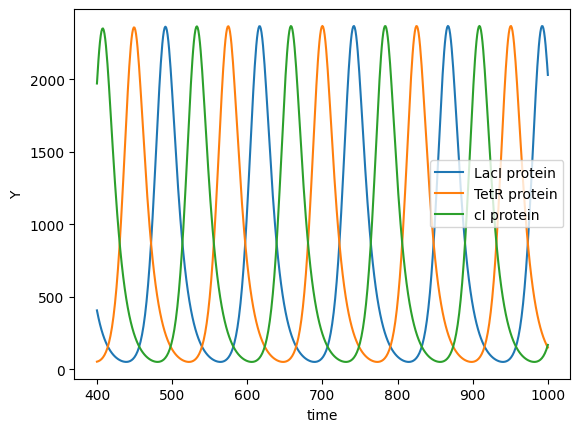

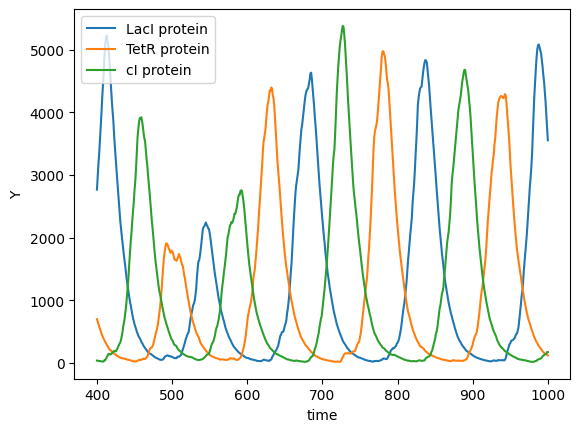

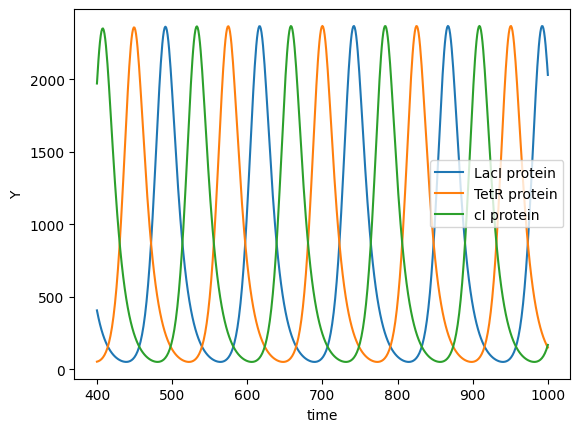

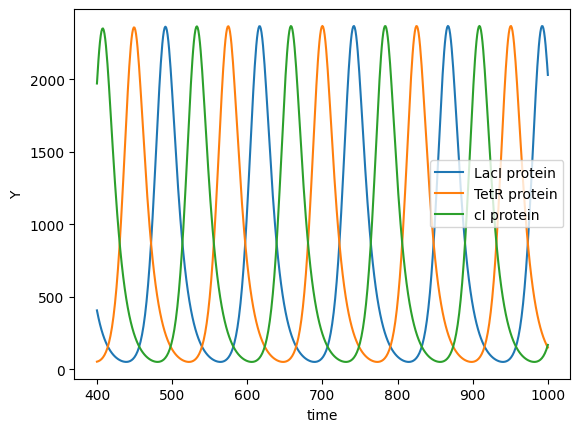

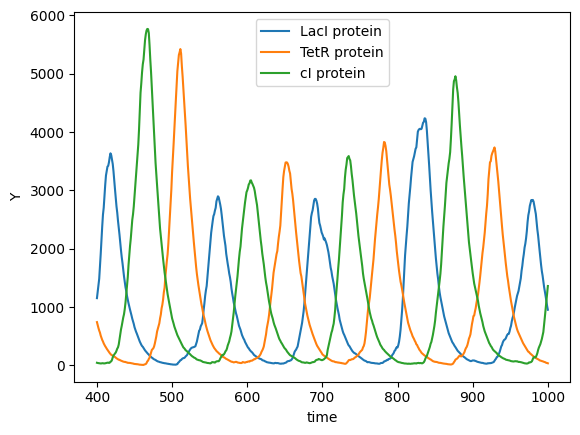

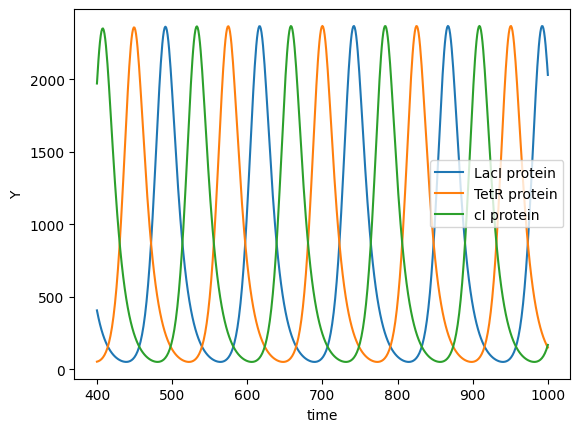

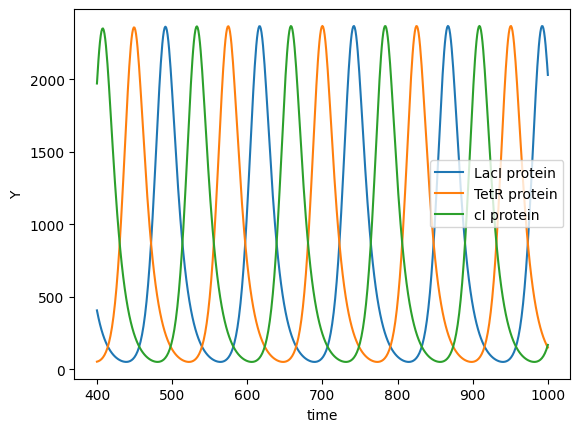

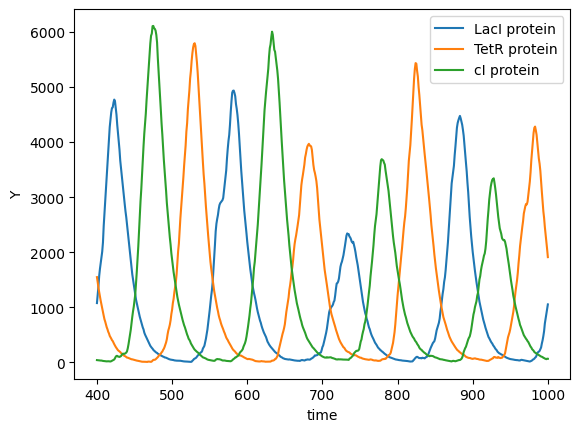

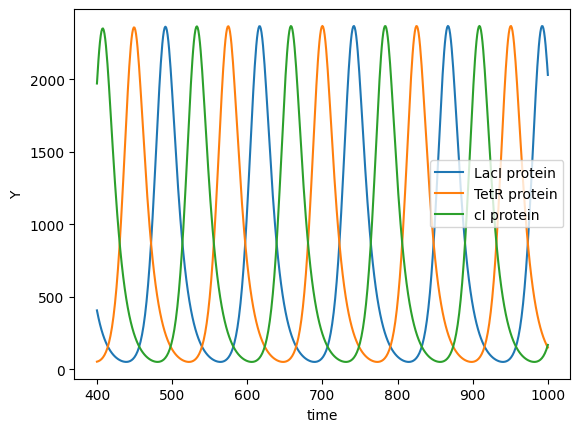

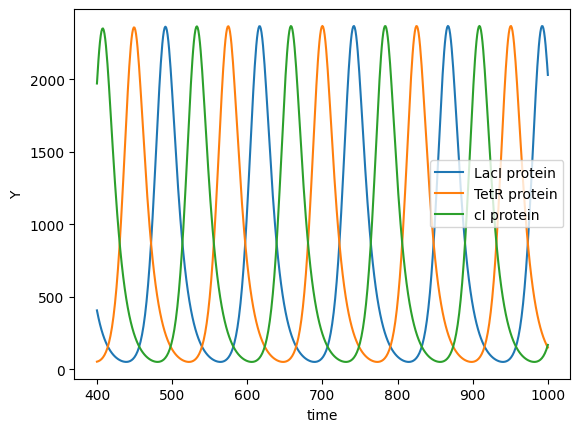

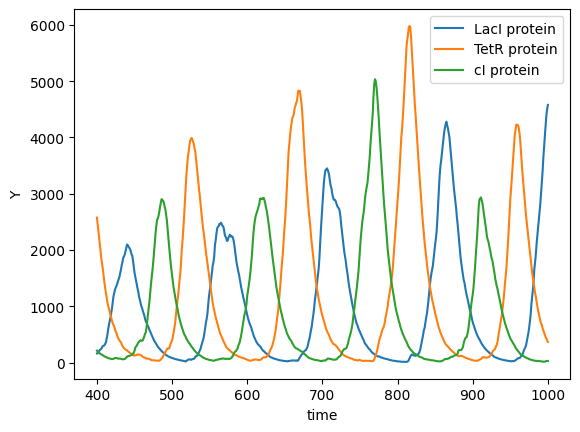

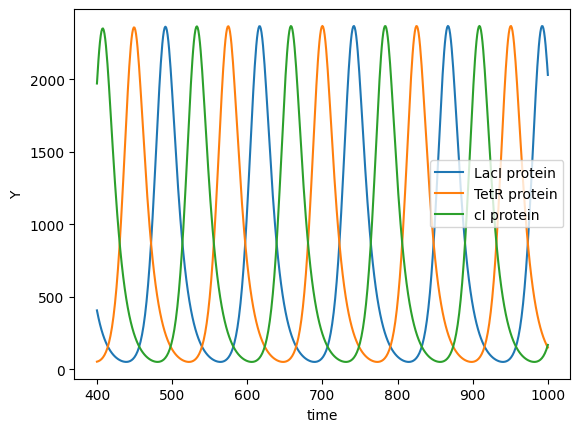

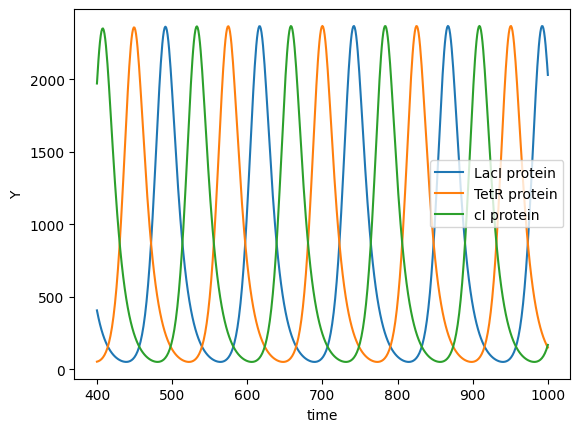

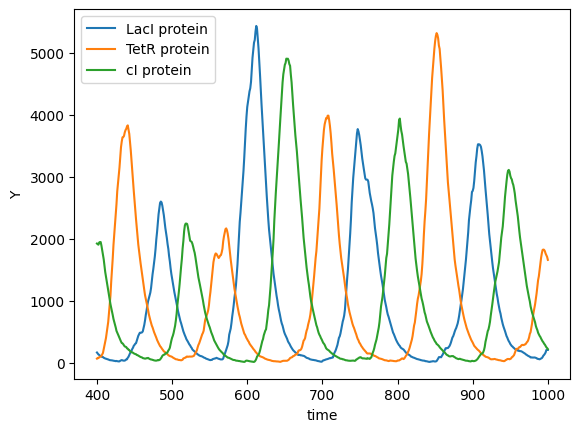

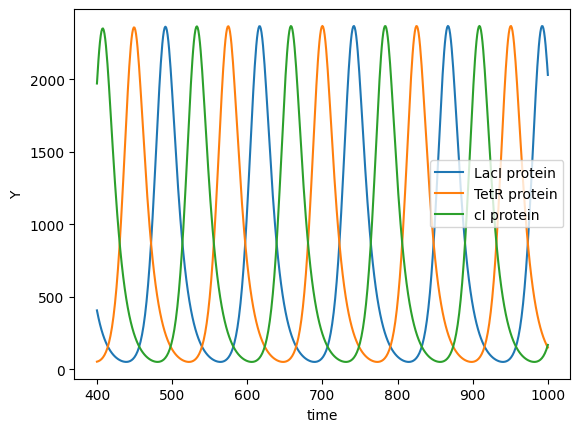

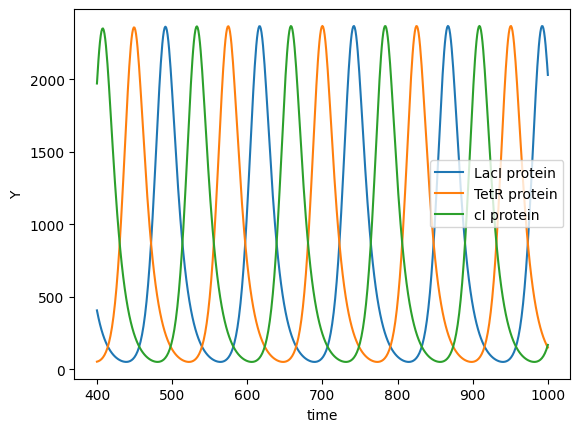

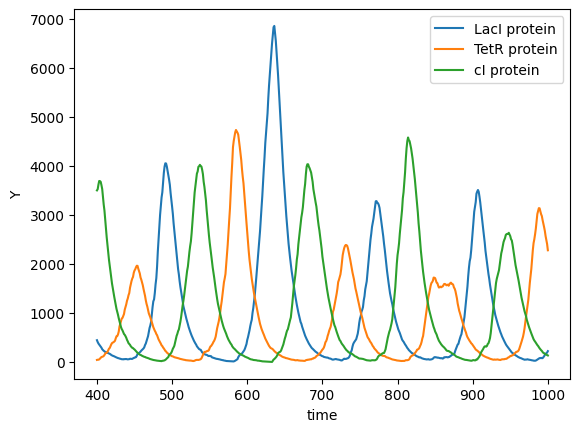

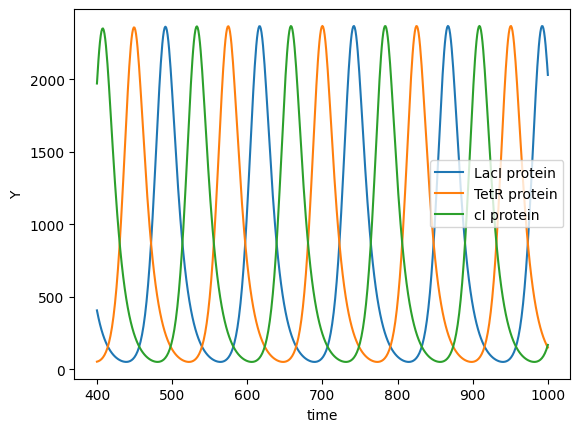

In [9]:
worker = Worker(job_params=job_params)

In [10]:
from verification_service import unique_id

comparison_id = "uniform-time-course-comparison-4fca4c60-bc0d-4583-90ed-a0f1082d1ea"

completed_doc = supervisor.db_connector.insert_completed_job(
    job_id=unique_id(),
    comparison_id=comparison_id,
    results=worker.job_result
)

In [11]:
completed_doc

{'job_id': '6daea42b-66c3-4bad-a364-1c9b40d602e1',
 'status': 'COMPLETED',
 'timestamp': '2024-06-23 11:51:39.260386',
 'comparison_id': 'uniform-time-course-comparison-4fca4c60-bc0d-4583-90ed-a0f1082d1ea',
 'results': {'results': [{'species_name': 'LacI protein',
    'mse': {'amici': {'amici': 0.0,
      'copasi': 3622937.938178322,
      'tellurium': 0.0005853579775907033},
     'copasi': {'amici': 3622937.938178322,
      'copasi': 0.0,
      'tellurium': 3622964.384838394},
     'tellurium': {'amici': 0.0005853579775907033,
      'copasi': 3622964.384838394,
      'tellurium': 0.0}},
    'proximity': {'amici': {'amici': True, 'copasi': False, 'tellurium': True},
     'copasi': {'amici': False, 'copasi': True, 'tellurium': False},
     'tellurium': {'amici': True, 'copasi': False, 'tellurium': True}},
    'output_data': {}},
   {'species_name': 'TetR protein',
    'mse': {'amici': {'amici': 0.0,
      'copasi': 2943610.3249464496,
      'tellurium': 0.0006002728774966173},
     'cop

In [3]:
supervisor._check_jobs()

{'status': 'something went wrong:\n`./tmp/Caravagna-J-Theor-Biol-2010-tumor-suppressive-oscillations.omex` is not a file.'}